In [2]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np

In [3]:
def df_d0_Hepes(x,y):
    """
    Berechnet die relative Änderung gegenüber dem ersten Wert.
    Formel: (x[i] - y[0]) / y[0]
    """
    df_d0 = []
    for i in range(0, len(x)):
        df_d0.append((x[i] - y[0]) / y[0])
    return df_d0

def Influx_data_Hepes(df1, x, y, z, w):
    """
    Erstellt einen DataFrame mit Mittelwerten und Standardabweichungen
    aus einem CSV-DataFrame und vier Zeilenindizes.
    
    Parameter:
    - df1: Eingabe-DataFrame (aus CSV)
    - x, y, z, w: Zeilenindizes für Zeit und die drei Messungen
    
    Rückgabe:
    - DataFrame mit Spalten: Time, 1.Messung, 2.Messung, 3.Messung, 
      Mittelwerte, Standardabweichung
    """
    df1 = df1.replace('OVER', np.nan)
    mM_10 = pd.DataFrame()
    mM_1= pd.DataFrame()
    mM_0_1 = pd.DataFrame()
    Hepes= pd.DataFrame()
    results = pd.DataFrame()
    
    #Hepes
        
    Hepes["1.Messung"] = to_float_array(np.array(df1.iloc[y+9])[1:])
    Hepes["2.Messung"] = to_float_array(np.array(df1.iloc[z+9])[1:])
    Hepes["3.Messung"] = to_float_array(np.array(df1.iloc[w+9])[1:])
    
    Hepes["Mittelwerte"] = Hepes[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    
   
    results["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_10["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_1["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_0_1["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    Hepes["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    #10mM    
    mM_10["1.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[y])[1:]),Hepes["Mittelwerte"])
    mM_10["2.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[z])[1:]),Hepes["Mittelwerte"])
    mM_10["3.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[w])[1:]),Hepes["Mittelwerte"])
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte1 = mM_10[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["10 mM Mittelwerte"] = mittelwerte1
    
    # Berechne Standardabweichung
    standardabweichung1 = mM_10[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["10 mM Standardabweichung"] = standardabweichung1
    
    #1mM
       
    mM_1["1.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[y+3])[1:]),Hepes["Mittelwerte"])
    mM_1["2.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[z+3])[1:]),Hepes["Mittelwerte"])
    mM_1["3.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[w+3])[1:]),Hepes["Mittelwerte"])
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte2 = mM_1[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["1 mM Mittelwerte"] = mittelwerte2
    
    # Berechne Standardabweichung
    standardabweichung2 = mM_1[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["1 mM Standardabweichung"] = standardabweichung2
    
    #0,1 mM
        
    mM_0_1["1.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[y+6])[1:]),Hepes["Mittelwerte"])
    mM_0_1["2.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[z+6])[1:]),Hepes["Mittelwerte"])
    mM_0_1["3.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[w+6])[1:]),Hepes["Mittelwerte"])
    
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte3 = mM_0_1[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["0,1 mM Mittelwerte"] = mittelwerte3
    
    # Berechne Standardabweichung
    standardabweichung3 = mM_0_1[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["0,1 mM Standardabweichung"] = standardabweichung3
    
    
    # Stelle sicher, dass 'Time' numeric ist
    
    merged = mM_10.merge(mM_1, on='Time', how='outer', suffixes=('_10','_1'))
    merged = merged.merge(mM_0_1, on='Time', how='outer')
    merged = merged.merge(Hepes, on='Time', how='outer', suffixes=('_0.1','_Hepes'))
    merged = merged.sort_values('Time').reset_index(drop=True)
    return results, merged

In [4]:
# Daten einlesen in Dataframes
data_path = '/workspaces/EWT/EWT5/data/EWT5_mit_Notizen.ods'
df_I_BSG_MCT1_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet1", skiprows=36)
df_I_BSG_MCT1_ilacco1_1= pd.read_excel(data_path, engine='odf', sheet_name="Sheet3", skiprows=36)
df_I_BSG_MCT1_ilacco1_2= pd.read_excel(data_path, engine='odf', sheet_name="Sheet4", skiprows=36)
df_I_BSG_MCT1_ilacco1_0_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet5", skiprows=36)
df_I_BSG_MCT1_ilacco1_1_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet14", skiprows=36)
df_I_BSG_MCT1_ilacco1_2_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet15", skiprows=36)
print(df_I_BSG_MCT1_ilacco1_0)

    Startzeit:                               20.11.2025 11:18:40 Unnamed: 2  \
0          NaN                                               NaN        NaN   
1          NaN                                               NaN        NaN   
2   Zyklus Nr.                                                 1          2   
3     Zeit [s]                                                 0         13   
4   Temp. [°C]                                                --         --   
5        10 mM                                             44139      45762   
6        10 mM                                             46442      47941   
7        10 mM                                             46169      48074   
8         1 mM                                             38807      40193   
9         1 mM                                             37601      39302   
10        1 mM                                             38726      39920   
11      0,1 mM                                      

In [5]:
# Daten verarbeiten
I_BSG_MCT1_ilacco1_0, M1 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_0,3,5,6,7)
I_BSG_MCT1_ilacco1_1,M2 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_1,3,5,6,7)
I_BSG_MCT1_ilacco1_2, M3 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_2,3,5,6,7)
I_BSG_MCT1_ilacco1_0_50μM_CCCP, M4 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_0_50μM_CCCP,3,5,6,7)
I_BSG_MCT1_ilacco1_1_50μM_CCCP, M5 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_1_50μM_CCCP,3,5,6,7)
I_BSG_MCT1_ilacco1_2_50μM_CCCP, M6 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_2_50μM_CCCP,3,5,6,7)

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_0_HK_plot.png


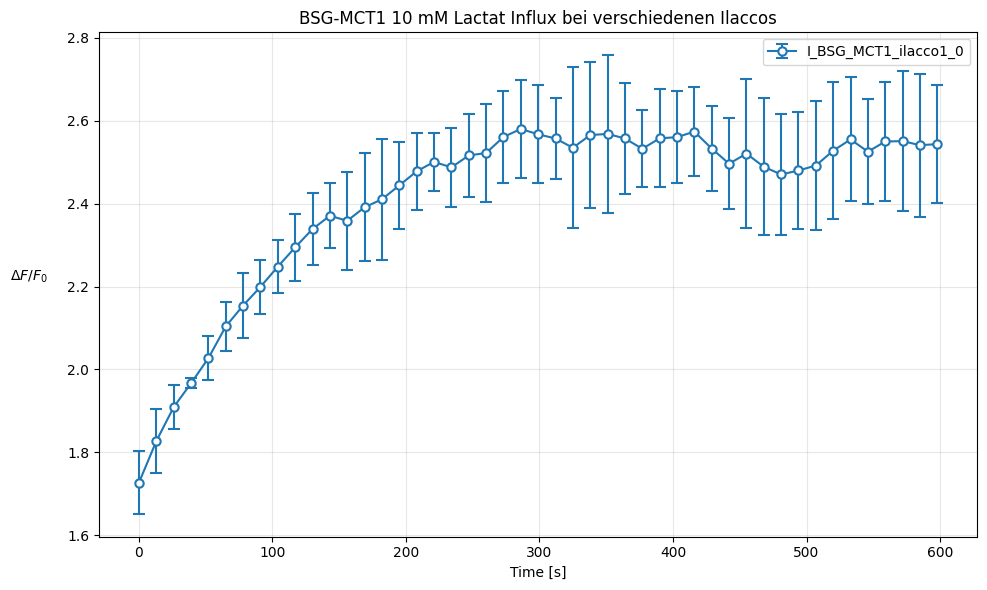

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_1_HK_plot.png


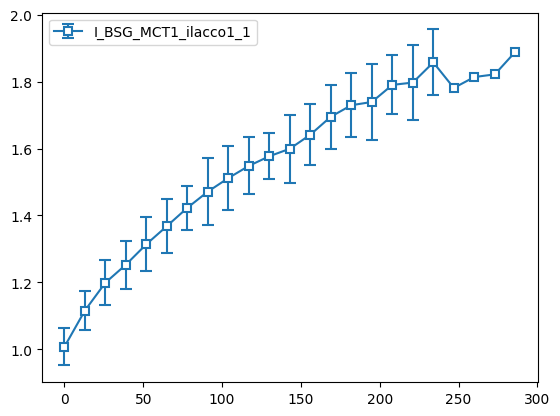

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_HK_plot.png


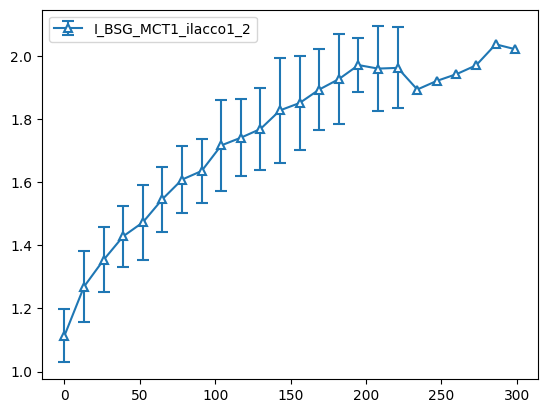

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_0_50μM_CCCP_HK_plot.png


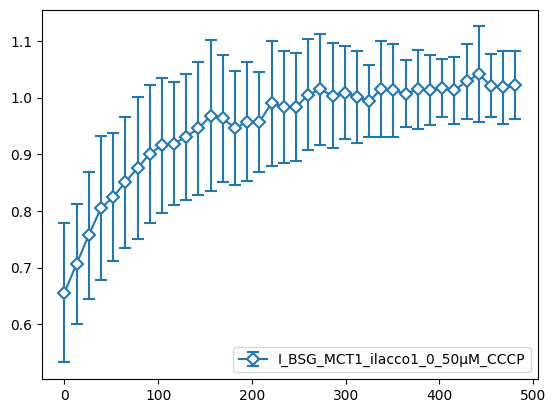

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_1_50μM_CCCP_HK_plot.png


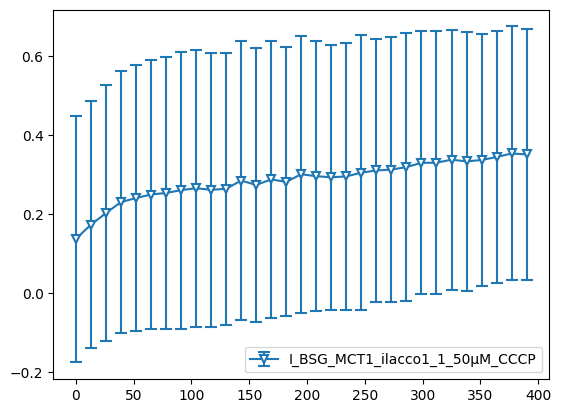

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_50μM_CCCP_HK_plot.png


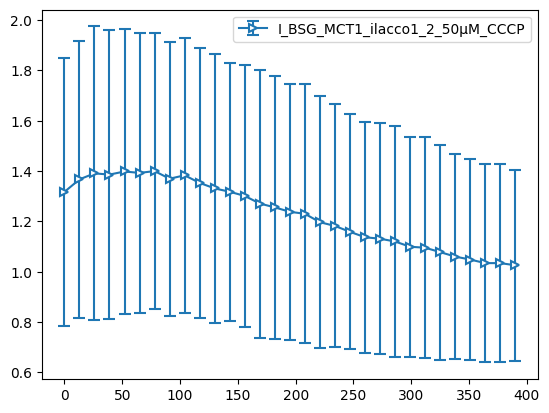

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_0_HK_plot.png


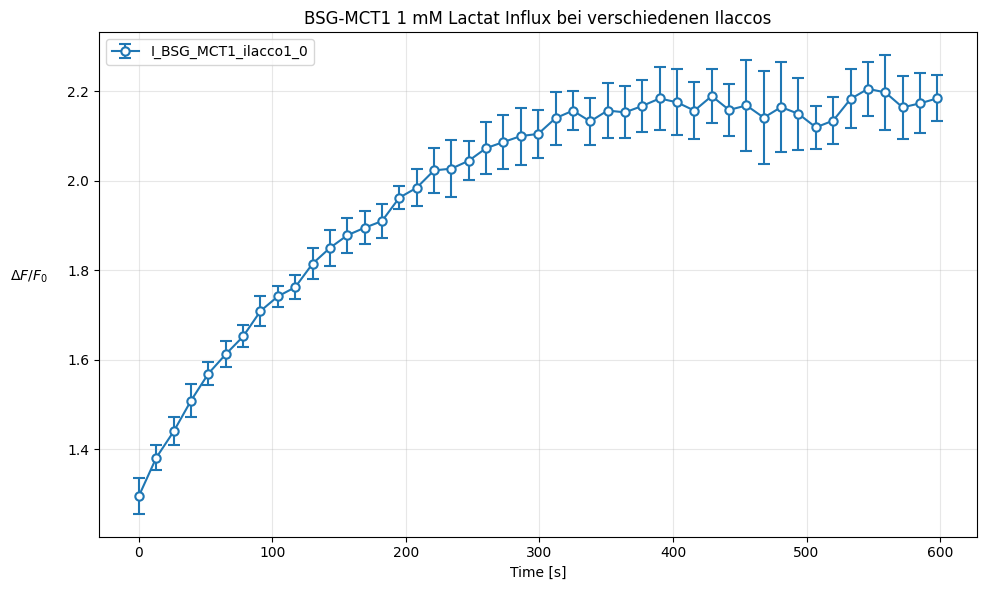

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_1_HK_plot.png


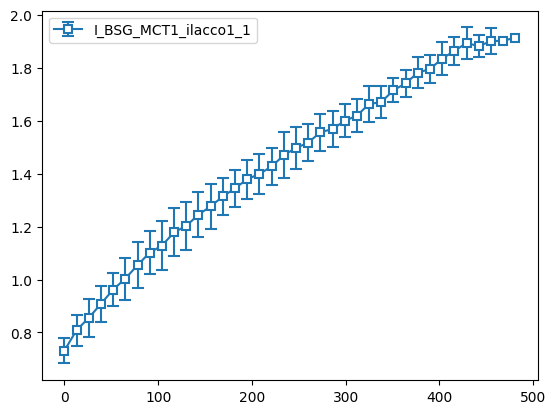

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_HK_plot.png


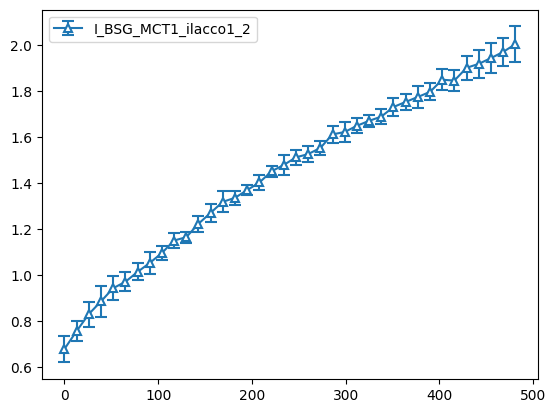

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_0_50μM_CCCP_HK_plot.png


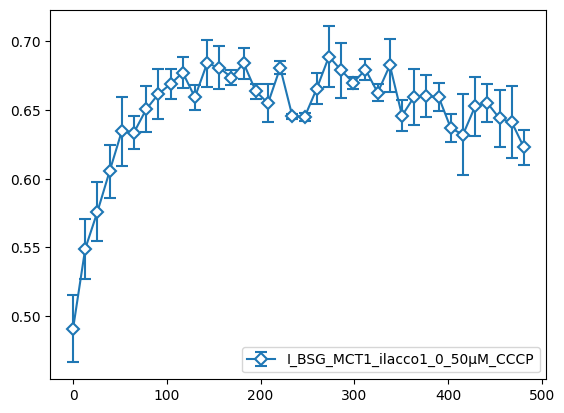

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_1_50μM_CCCP_HK_plot.png


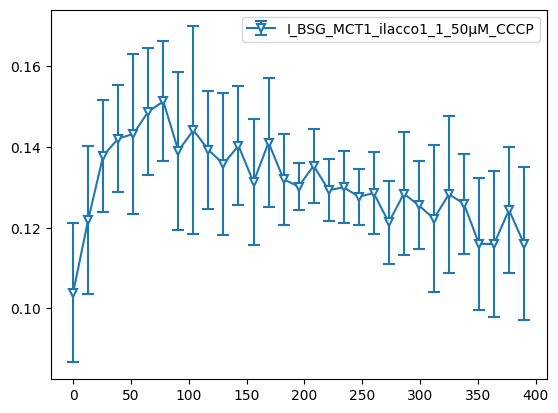

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_50μM_CCCP_HK_plot.png


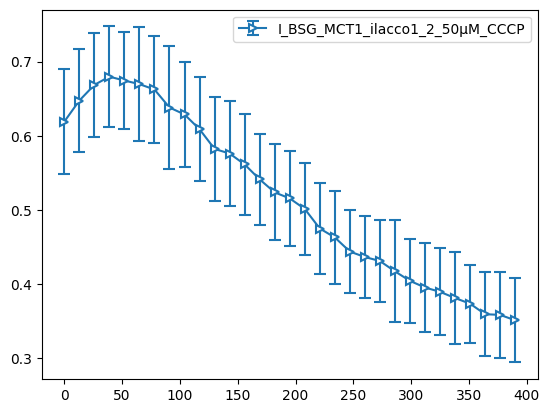

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_0_HK_plot.png


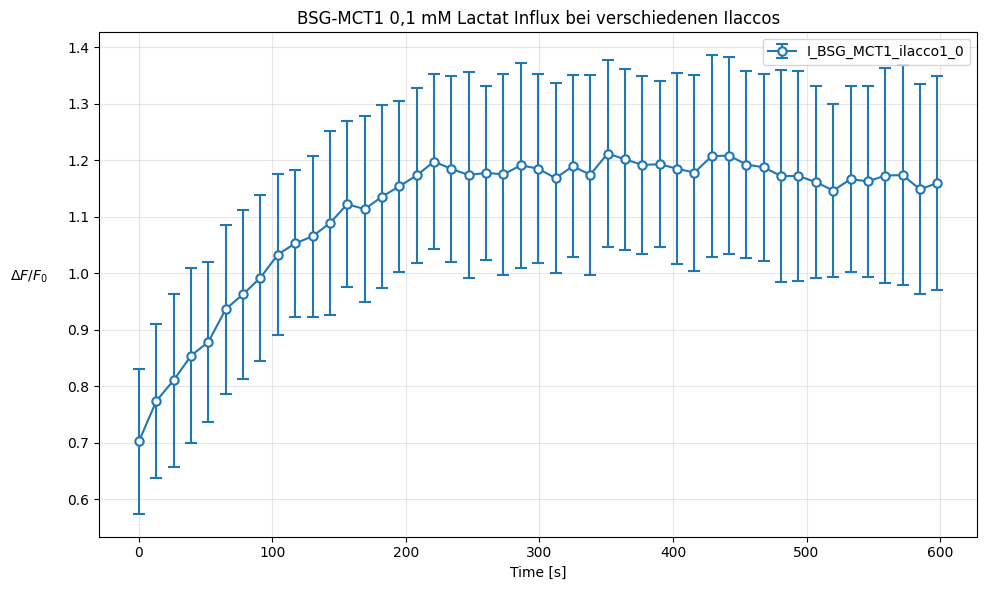

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_1_HK_plot.png


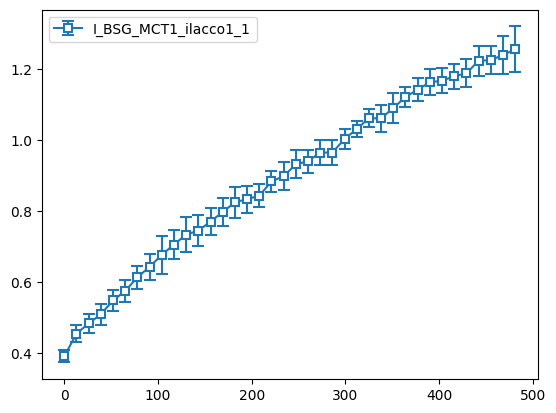

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_HK_plot.png


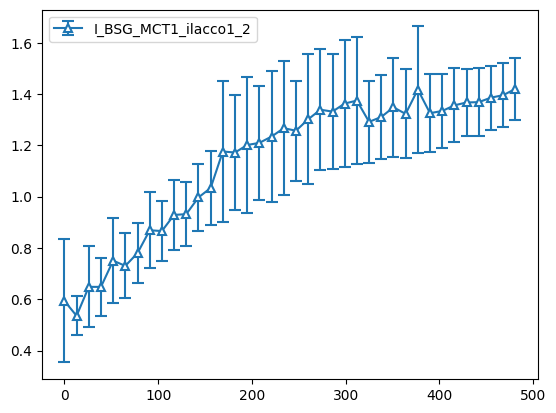

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_0_50μM_CCCP_HK_plot.png


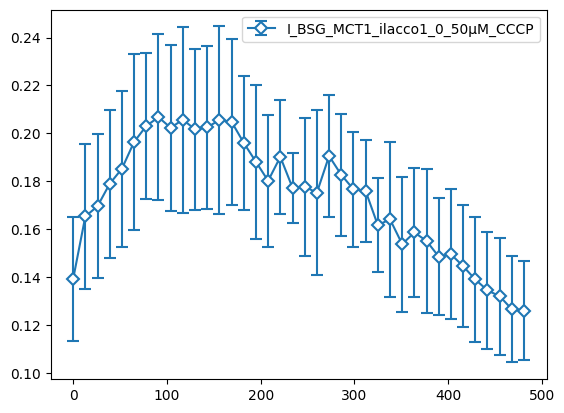

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_1_50μM_CCCP_HK_plot.png


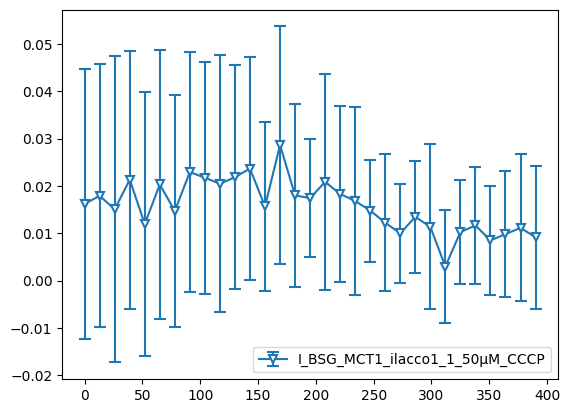

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_50μM_CCCP_HK_plot.png


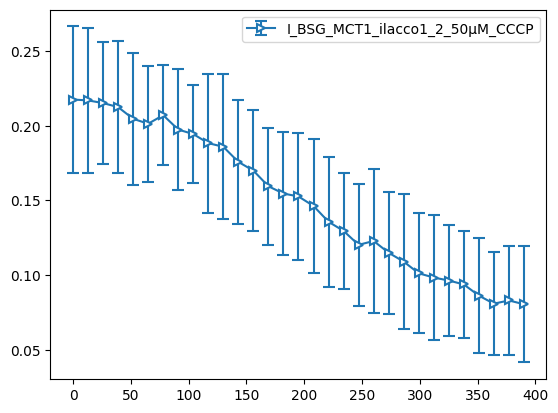

In [ ]:
# Plotten der Ergebnisse
import matplotlib.pyplot as plt

data_frames = [
    ('I_BSG_MCT1_ilacco1_0','o', I_BSG_MCT1_ilacco1_0),
    ('I_BSG_MCT1_ilacco1_1', 's', I_BSG_MCT1_ilacco1_1),
    ('I_BSG_MCT1_ilacco1_2', '^', I_BSG_MCT1_ilacco1_2),
    ('I_BSG_MCT1_ilacco1_0_50μM_CCCP', 'D', I_BSG_MCT1_ilacco1_0_50μM_CCCP),
    ('I_BSG_MCT1_ilacco1_1_50μM_CCCP', 'v', I_BSG_MCT1_ilacco1_1_50μM_CCCP),
    ('I_BSG_MCT1_ilacco1_2_50μM_CCCP', '>', I_BSG_MCT1_ilacco1_2_50μM_CCCP),]
contrations = ['10 mM', '1 mM', '0,1 mM']

for conc in contrations:
    plt.figure(figsize=(10, 6))
    plt.title(f'BSG-MCT1 {conc} Lactat Influx bei verschiedenen Ilaccos')
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.08, 0.5)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    for name,marker, df in data_frames:
        plt.errorbar(df["Time"], df[f"{conc} Mittelwerte"], yerr=df[f"{conc} Standardabweichung"], 
                        marker=marker, linestyle='-', label=name, capsize=4, 
                        markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    plt.legend()
    outpath = os.path.join('..', 'figueres', f'{name}_HK_plot.png')
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    print(f'Saved plot: {outpath}')
    plt.show()

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_0_plot.png


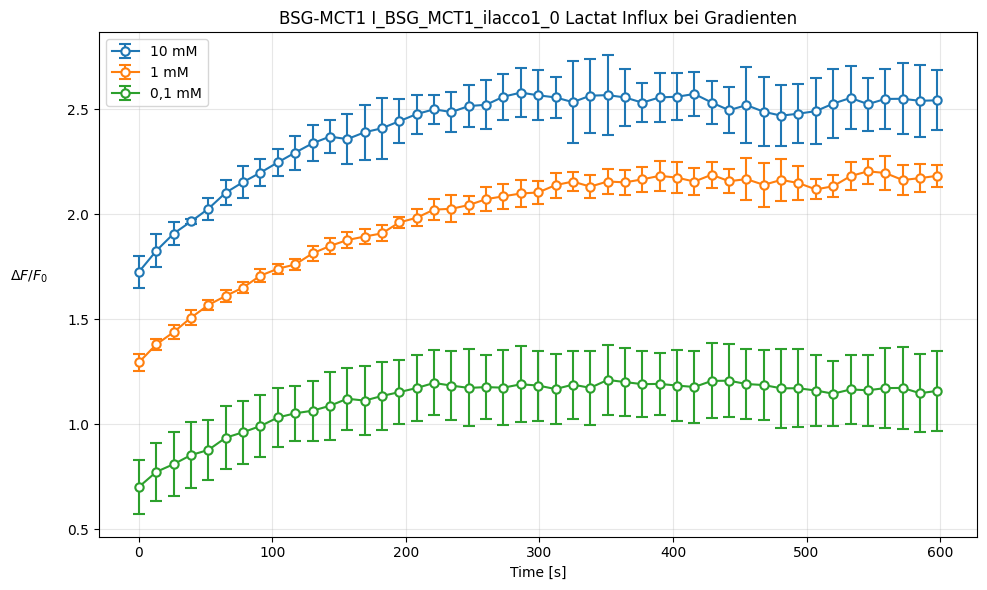

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_1_plot.png


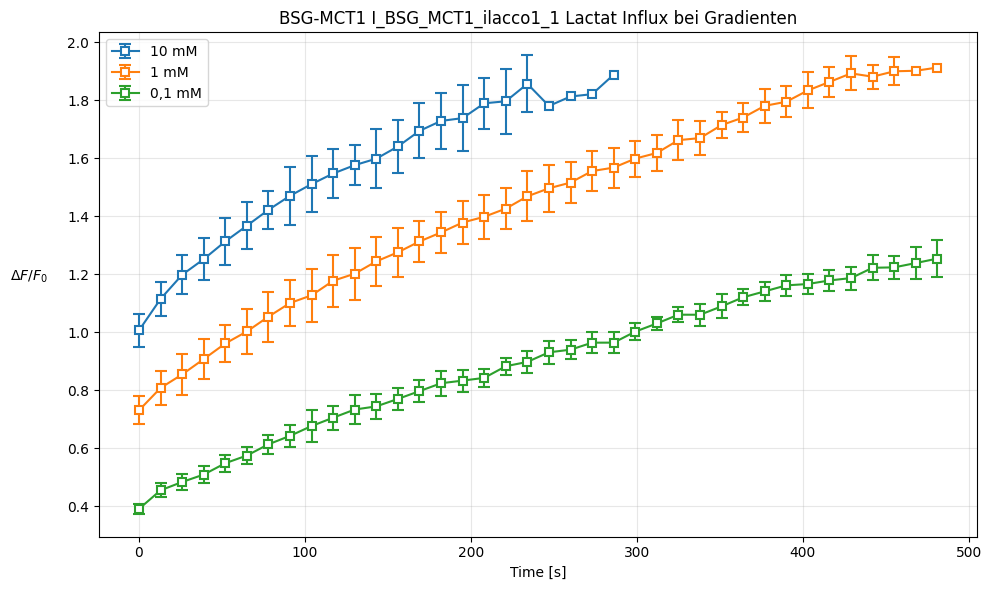

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_plot.png


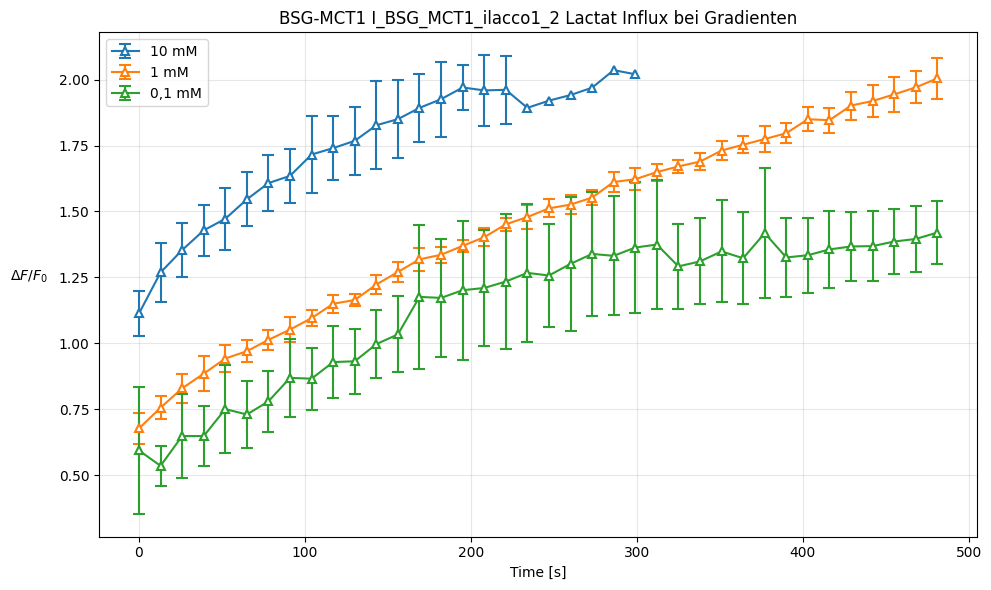

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_0_50μM_CCCP_plot.png


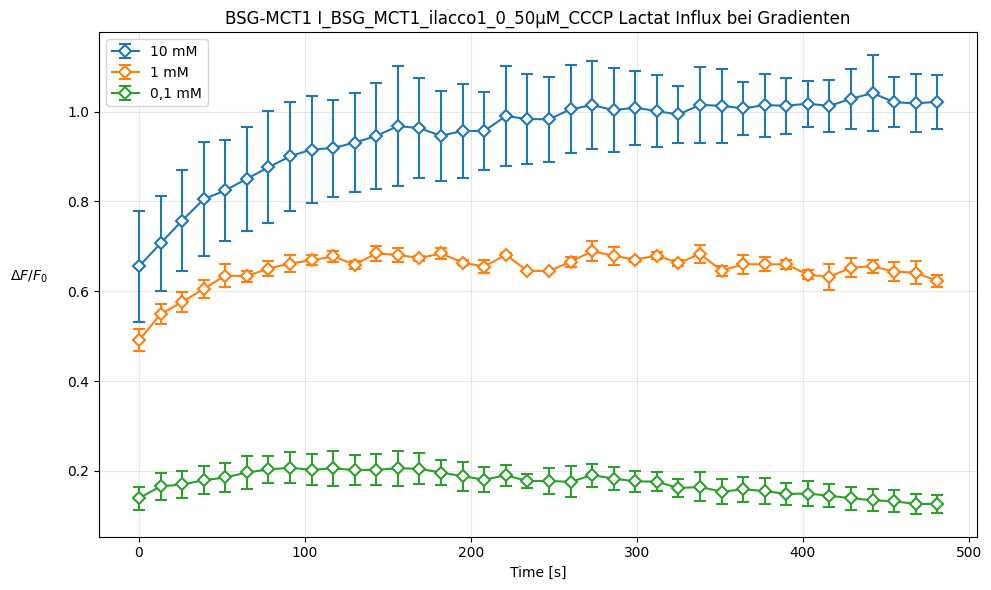

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_1_50μM_CCCP_plot.png


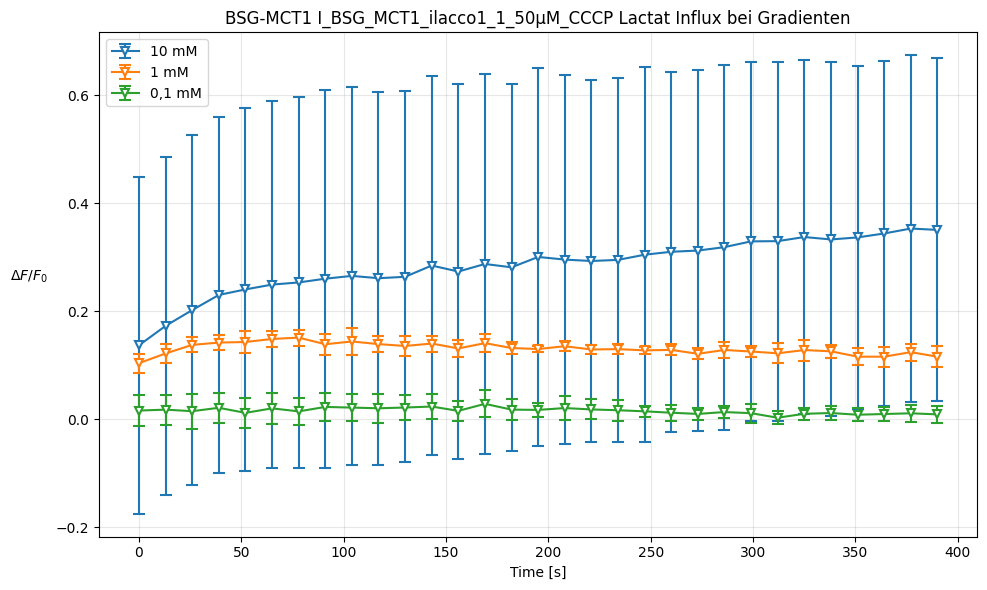

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_50μM_CCCP_plot.png


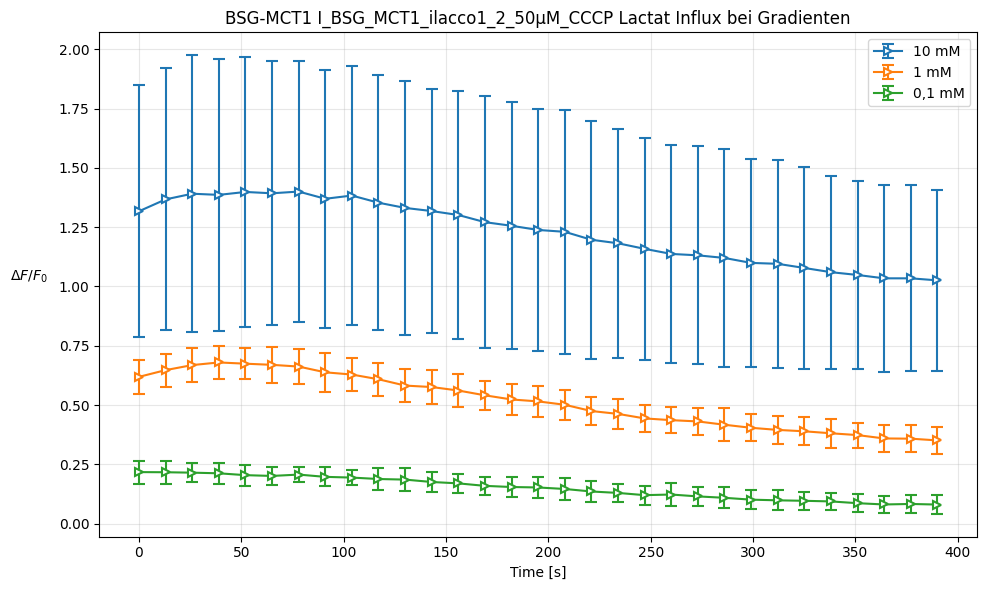

In [7]:
import matplotlib.pyplot as plt

data_frames = [
    I_BSG_MCT1_ilacco1_0,
    I_BSG_MCT1_ilacco1_1,
    I_BSG_MCT1_ilacco1_2,
    I_BSG_MCT1_ilacco1_0_50μM_CCCP,
    I_BSG_MCT1_ilacco1_1_50μM_CCCP,
    I_BSG_MCT1_ilacco1_2_50μM_CCCP]
concentrations = ['10 mM', '1 mM', '0,1 mM']

labels = ["I_BSG_MCT1_ilacco1_0", 
          "I_BSG_MCT1_ilacco1_1",
          "I_BSG_MCT1_ilacco1_2",
          "I_BSG_MCT1_ilacco1_0_50μM_CCCP",
          "I_BSG_MCT1_ilacco1_1_50μM_CCCP",
          "I_BSG_MCT1_ilacco1_2_50μM_CCCP"]
markers_list = ['o', 's', '^', 'D', 'v', '>']

for df, label, marker in zip(data_frames, labels, markers_list):
    plt.figure(figsize=(10, 6))
    plt.title(f'BSG-MCT1 {label} Lactat Influx bei Gradienten')
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.08, 0.5)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    for conc in concentrations:
        plt.errorbar(df["Time"], df[f"{conc} Mittelwerte"], yerr=df[f"{conc} Standardabweichung"], 
                        marker=marker, linestyle='-', label=conc, capsize=4, 
                        markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    plt.legend()
    outpath = os.path.join('..', 'figueres', f'{label}_plot.png')
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    print(f'Saved plot: {outpath}')
    plt.show()
